In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [69]:
#create the "2D space"
N = 100 #number of points in grid
L = 1 #boundary
x_start, x_end = -L,L #boundaries
y_start, y_end = -L,L #boundaries
x = np.linspace(x_start, x_end, N) #generates coordinates
y = np.linspace(y_start, y_end, N) #generates coordinates
X, Y = np.meshgrid(x,y)

In [70]:
charges = [] #array to hold all charges

In [71]:
#create point charge class

class PointCharge:
    Q = 1.6e-19
    k = 8.99e9
    
    def __init__(self,q,x_init,y_init):
        self.q = q*Q
        self.x = x_init
        self.y = y_init
        if self.q > 0:
            self.color = "r"
        elif self.q < 0:
            self.color = "b"
        else:
            self.color = "white"
        
        self.efield_x = self.k * (self.q * (X-self.x))/((X-self.x)**2+(Y-self.y)**2)**(3/2)
        self.efield_y = self.k * (self.q * (Y-self.y))/((X-self.x)**2+(Y-self.y)**2)**(3/2)
               
        self.total_efield = np.sqrt(self.efield_x**2 + self.efield_y**2)
        #for scaling purposes
        self.total_efield = self.total_efield**(1/10)
                
        charges.append(self)

In [72]:
def plot_electric_field(charge): #currently unused
    width = 10
    height = (y_end - y_start) / (x_end - x_start) * width
    plt.figure(figsize=(width,height))
    plt.xlabel("x",fontsize=16)
    plt.ylabel("y",fontsize=16)
    plt.xlim(x_start,x_end)
    plt.ylim(y_start,y_end)
    plt.streamplot(X,Y,
                   charge.efield_x,charge.efield_y,
                   density=1,
                   linewidth=2,
                   color="black",
                   arrowsize=2,
                   arrowstyle="->")
    plt.imshow(charge.total_efield,
              interpolation="bilinear",
              cmap="RdBu",
              origin="lower",
              extent=[-1,1,-1,1])
    plt.colorbar()
    plt.scatter(charge.x,charge.y,
               color=charge.color,
               s=20,
               marker="o")

In [73]:
def plot_all_charges():
    width = 6
    height = (y_end - y_start) / (x_end - x_start) * width
    plt.figure(figsize=(width,height))
    plt.xlabel("x",fontsize=16)
    plt.ylabel("y",fontsize=16)
    plt.xlim(x_start,x_end)
    plt.ylim(y_start,y_end)
    
    sum_efield_x = np.sum([i.efield_x for i in charges], axis=0)
    sum_efield_y = np.sum([i.efield_y for i in charges], axis=0)
    
    sum_efields = np.sum([i.total_efield for i in charges], axis=0)
    
    x_all, y_all = [i.x for i in charges],[i.y for i in charges]
    colors = [i.color for i in charges]
    
    plt.streamplot(X,Y,
                   sum_efield_x, sum_efield_y,
                   density=1,
                   linewidth=2,
                   color="black",
                   arrowsize=2,
                   arrowstyle="->") 
#     plt.imshow(sum_efields,
#                interpolation="bilinear",
#                cmap="Greens",
#                origin="lower",
#                extent=[x_start,x_end,y_start,y_end])
    plt.contourf(X,Y,sum_efields,
                cmap="Greens")
#     plt.colorbar()
    plt.scatter(x_all,y_all,
               color=colors,
               s=80,
               marker="o")

In [74]:
def plot_all_3d():
    width = 6
    height = (y_end - y_start) / (x_end - x_start) * width
    
    sum_efields = np.sum([i.total_efield for i in charges], axis=0)
    
    fig = plt.figure(figsize=(width,height))
    ax = plt.axes(projection="3d")
    ax.set_xlabel("x",fontsize=16)
    ax.set_ylabel("y",fontsize=16)
    ax.set_zlabel("magnitude",fontsize=16)
    ax.plot_surface(X,Y,
                   sum_efields,
                   cmap="Greens")

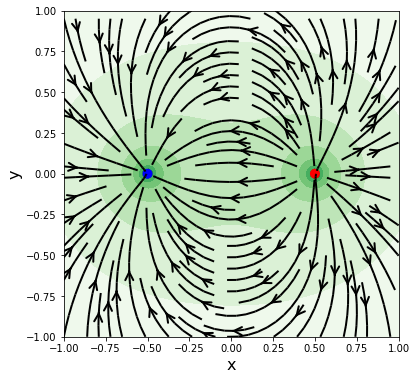

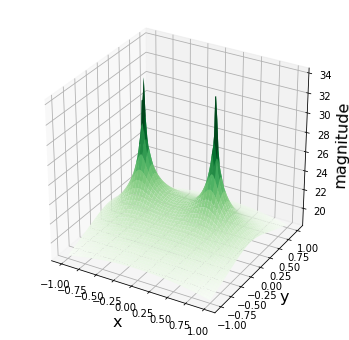

In [75]:
#dipole
charges.clear()
Q = 1
PointCharge(Q,0.5,0)
PointCharge(-Q,-0.5,0)
plot_all_charges()
plot_all_3d()

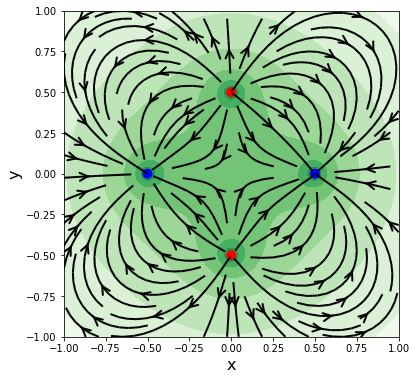

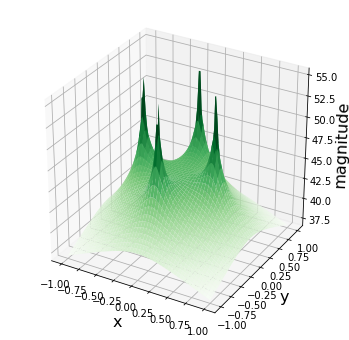

In [76]:
#quadrapole
charges.clear()
Q = 1
PointCharge(-Q,0.5,0)
PointCharge(-Q,-0.5,0)
PointCharge(Q,0,0.5)
PointCharge(Q,0,-0.5)
plot_all_charges()
plot_all_3d()

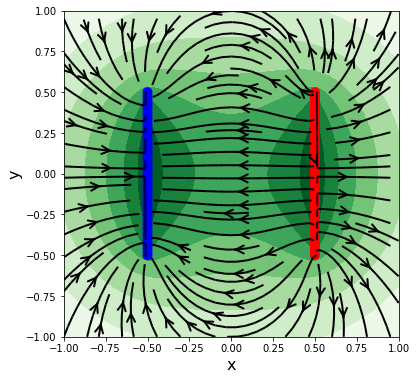

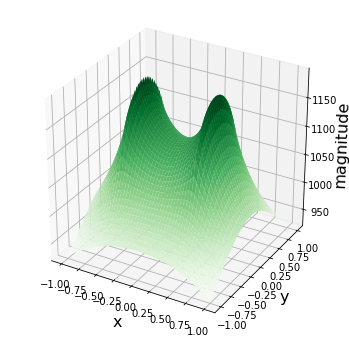

In [77]:
#line charge made up of point charges
charges.clear()
Q = 1
p = 50
ys = np.linspace(-0.5,0.5,p)
for y in ys:
    PointCharge(-Q,-0.5,y) #negative
    PointCharge(Q,0.5,y) #positve
plot_all_charges()
plot_all_3d()

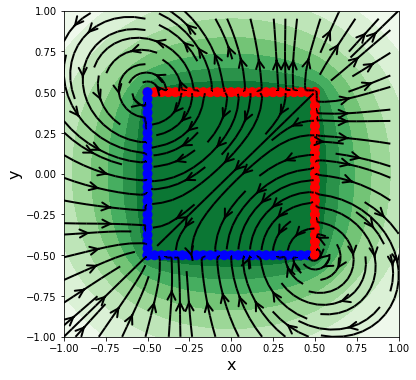

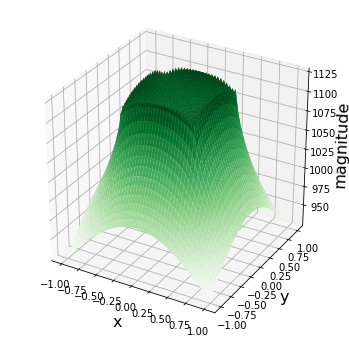

In [78]:
#square line charge
charges.clear()
Q = 1
p = 25
xs = np.linspace(-0.5,0.5,p)
ys = np.linspace(-0.5,0.5,p)
for x in xs:
    PointCharge(-Q,x,-0.5)
    PointCharge(Q,x,0.5)
for y in ys:
    PointCharge(-Q,-0.5,y)
    PointCharge(Q,0.5,y)
plot_all_charges()
plot_all_3d()

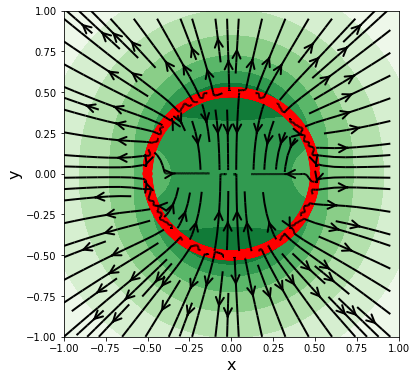

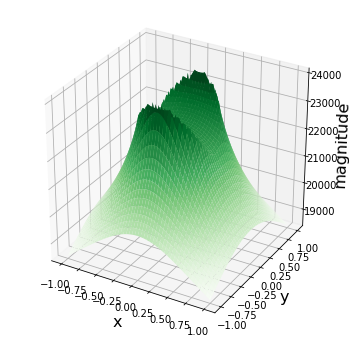

In [79]:
#ring charge
charges.clear()

def ring_top(R,x):
    y = np.sqrt(R**2-x**2)
    return y
def ring_bot(R,x):
    y = -np.sqrt(R**2-x**2)
    return y

p = 1000
R = 0.5
xs = np.linspace(-R,R,p)
y1 = ring_top(R,xs)
y2 = ring_bot(R,xs)

for x in xs:
    PointCharge(Q,x,ring_top(R,x))
    PointCharge(Q,x,ring_bot(R,x))

plot_all_charges()
plot_all_3d()